# Pymaceuticals Inc.
---

### Analysis

- Based on the bar chart, the drug regimen with the highest number of mice tested on was Capomulin. Whereas Propriva had the least amount of mice tested for this drug. 
- There is a strong correlation between the weight of the mouse and the tumor volume size for the drug Capomulin. The correlation is 0.84, meaning that as weight increases so does the average for the tumor volume size.
- When comparing the four drug regimens in our box and wisker plots, I can conclude that Capomulin and Ramicane drug regimens are better at reducing tumor volume size than the other two drug regimens. 
 

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how="outer" , on=["Mouse ID"])
                            
# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [74]:
# Checking the number of mice.
total_mice = combined_data_df["Mouse ID"].nunique()
total_mice

249

In [75]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [76]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data_df[combined_data_df["Mouse ID"].isin(duplicate_mice_ID)]
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [77]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_mice_ID)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [78]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
standard_dev = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stats = pd.DataFrame({"Tumor Volume Mean": mean,
                             "Tumor Volume Median ": median,
                             "Tumor Volume Variance": variance,
                             "Tumor Volume Standard Deviation": standard_dev,
                             "Tumor Volume SEM": sem})
summary_stats.head()


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
aggregation_summary =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation_summary.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

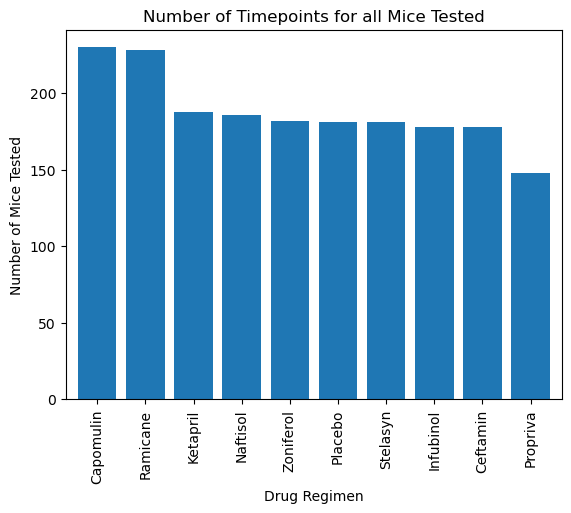

In [81]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
micecount = clean_df["Drug Regimen"].value_counts()

pandasplt = micecount.plot(kind="bar", legend=False, width=0.8, align="center")

# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Timepoints for all Mice Tested")

plt.show()


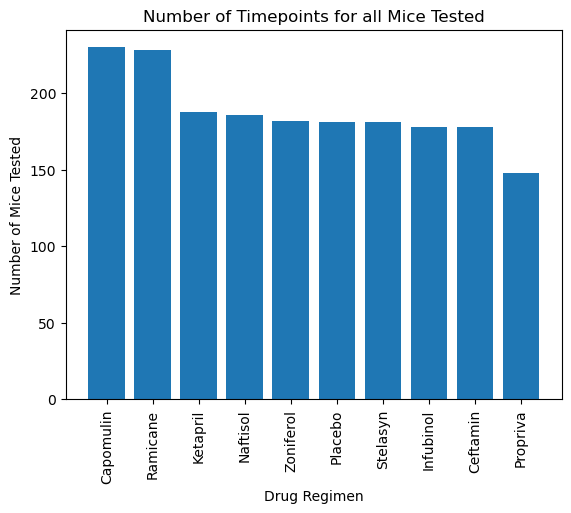

In [82]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"]
y_axis = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]


plt.bar(x_axis, y_axis, width=0.8, align='center')


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Timepoints for all Mice Tested")

plt.show()

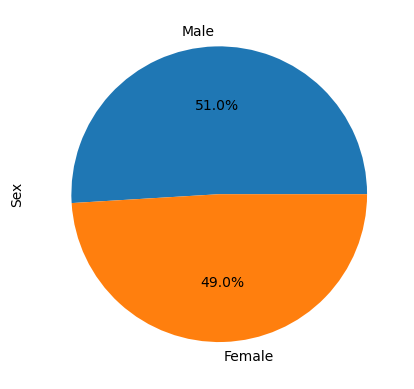

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()


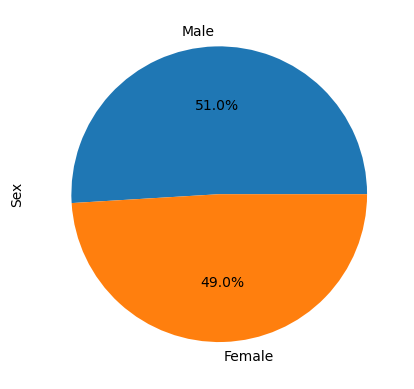

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

plt.pie(gender_data, labels=labels, autopct="%1.1f%%") 
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[combined_data_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[combined_data_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[combined_data_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[combined_data_df["Drug Regimen"] == "Ceftamin", :]

# Capomulin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [86]:
#Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [87]:
#Infubinol
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [88]:
#Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [91]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
druglist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_data_df[combined_data_df["Drug Regimen"].isin(druglist)]

last_tp = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_tp = last_tp.stack(level=0).unstack(level=0)

treatment = 0
for drug in druglist:
    quartiles = last_tp[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
------------------------------------------------------------
Values below 25.35 could be Ceftamin outliers.
Values above 87.67 could be Ceftamin outliers.
------------------------------------------------------------


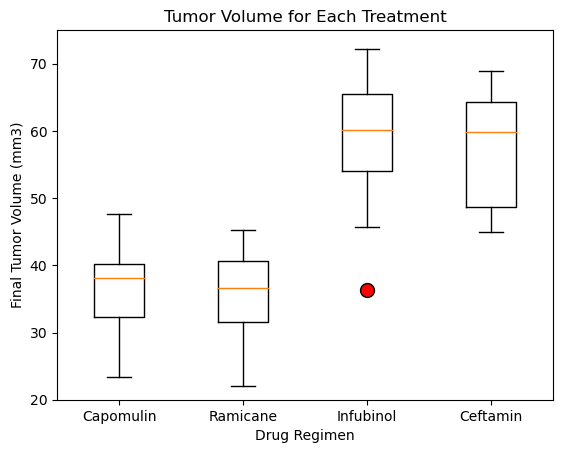

In [94]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

plotdata = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.title('Tumor Volume for Each Treatment')
plt.ylim(20, 75)
plt.boxplot(plotdata, labels=Regimen, widths = 0.4, vert=True, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 10})

plt.show()


## Line and Scatter Plots

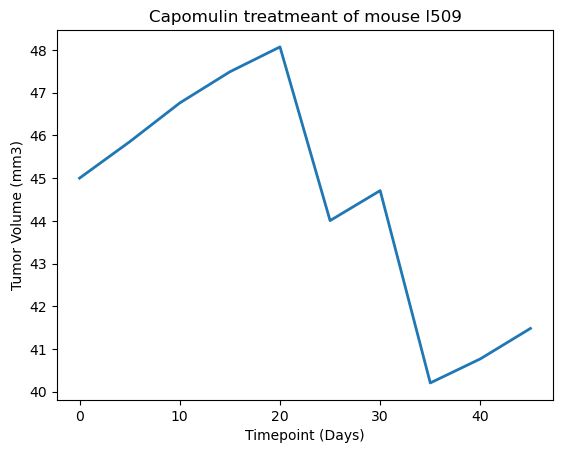

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
linegph_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
linegph_df

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axisTP = linegph_df["Timepoint"]
tumorvol = linegph_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumorvol, linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

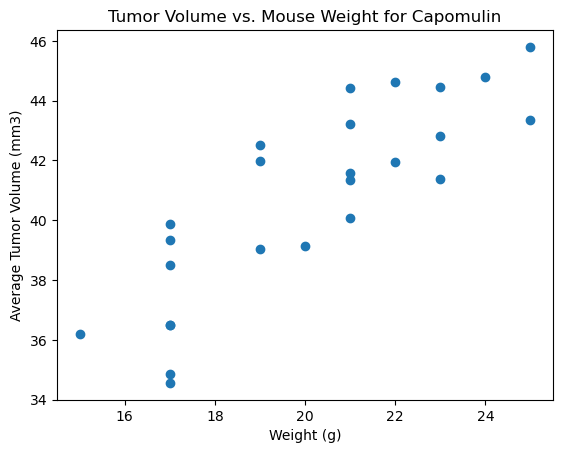

In [95]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = Capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Mouse Weight for Capomulin')

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume for capomulin is 0.84


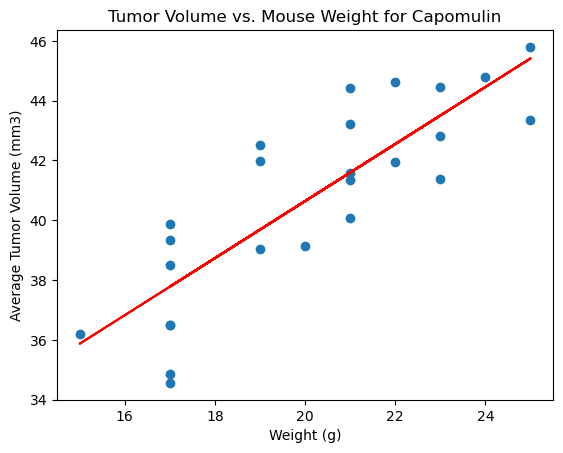

In [96]:
# Calculate the correlation coefficient and linear regression model 
corr=round(st.pearsonr(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume for capomulin is {corr}")

# for mouse weight and average tumor volume for the Capomulin regimen
model = st.linregress(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])

m = .9544396890241049 #slope
b = 21.552160532685008 #intercept
y_values = capomulin_avg["Weight (g)"]*m +b
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
plt.plot(capomulin_avg["Weight (g)"], y_values, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Tumor Volume vs. Mouse Weight for Capomulin')

plt.show()
